# Daten Exploration

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import Preprocessing as pp
import glob
import Helpers
import csv

path_data = '/Users/marvinwoller/Desktop/SmartDataAnalytics/Blatt2/data/'

rootdir_train = path_data + 'train/'
rootdir_test = path_data + 'test/'

train_labels_path = path_data + 'train_label.csv'
test_labels_path = path_data + 'test_label.csv'

## Exploratinon: train_labels

                ret
count  33360.000000
mean       0.487320
std        0.499847
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
                                  file_name  ret
0  0000f25f-4d58-3eee-bbc3-5c7b7759ee66.csv    0
1  005d6a9a-fc32-37f3-a47f-5ba4174c858f.csv    0
2  005f6000-ff67-3b1b-b471-aeba7b1aed26.csv    1
3  0060a2c7-0e9d-3816-9822-6b4b300693c6.csv    0
4  00c3d182-f3b8-367d-8f4d-2b06dc9c3c4c.csv    0


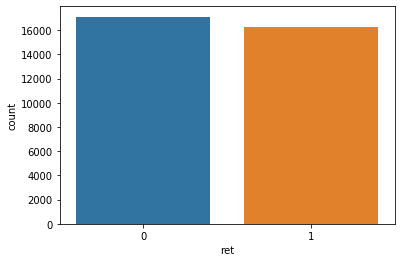

In [9]:
# ------------------------------------------ Exploration train_labels ----------------------------------------
train_labels = pd.read_csv(train_labels_path)

# Print general description and head of train_label dataset
print(train_labels.describe())
print(train_labels.head())

# Check the distribution of the training lables 
ax = sns.countplot(x="ret", data=train_labels)

Anhand dieses Plots kann man sehen, dass die Lables des Trainings-Datensatzes ausbalanciert sind. Somit ist später keine explizite Gewichtung mittels z.B. class_weight nötig.

In [10]:
# Check if any label value is missing
print("Null values count: " + str(train_labels["ret"].isna().values.sum()))

#Check labels for duplicate CSV files
print("Duplicates: " + str(train_labels['file_name'].duplicated().any()))

Null values count: 0
Duplicates: False


Der train_label Datensatz ist vollständig und enthällt keine Duplikate

## Exploratin test_labels

                ret
count  14978.000000
mean       0.493791
std        0.499978
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
                                  file_name  ret
0  001448e2-09aa-3560-9650-3c791a39ff01.csv  1.0
1  006c4689-08f2-3752-9096-8c616badfda9.csv  1.0
2  0080040c-3ccf-333e-ad9a-dd516c30200c.csv  0.0
3  00a22713-68d5-372a-a009-b948ce453442.csv  0.0
4  00b61408-1ab3-303d-b0a4-9b53aa93810e.csv  1.0


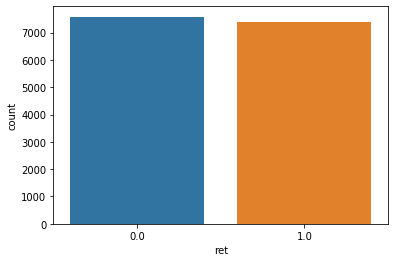

In [11]:
# ------------------------------------------ Exploration test_labels ----------------------------------------
test_labels = pd.read_csv(test_labels_path)

# Print general description and head of train_label dataset
print(test_labels.describe())
print(test_labels.head())

# Check the distribution of the training lables 
ax = sns.countplot(x="ret", data=test_labels)

Anhand dieses Plots kann man sehen, dass die Labels des Test-Datensatzes ausbalanciert sind.

In [12]:
# Check if any label value is missing
print("Null values count: " + str(test_labels["ret"].isna().values.sum()))

#Check labels for duplicate CSV files
print("Duplicates: " + str(test_labels['file_name'].duplicated().any()))

Null values count: 1308
Duplicates: False


Der test_label Datensatz ist nicht vollständig und enthält NaN Werte. Duplikate sind keine vorhanden.

## Exploration: train data

### Einzelne CSV Datei
An dieser Stelle explorieren wir den train Datensatz. Dazu betrachten wir zunächst eine einzelne CSV Datei.

In [13]:
files = glob.glob(rootdir_train + '**/*.csv')
len_files = len(files)
df_one_csv = pd.read_csv(files[0])

In [14]:
# Head of dataframe
df_one_csv.head()

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,Pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,Drive 2 thyristor temperature,Drive 3 thyristor temperature,Drive 1 output torque,Drive 2 output torque,Drive 3 output torque
0,0.14,47.74,21.0,21.0,21.0,2.12,2.16,3.08,0.16,-59.4,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.08,159.52,21.0,21.0,21.0,2.62,1.70,3.14,1.12,-69.8,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.30,241.24,21.0,21.0,21.0,2.26,1.50,3.02,1.35,31.4,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.68,355.50,21.0,21.0,21.0,2.54,2.42,3.22,0.74,-1.8,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.51,155.02,21.0,21.0,21.0,2.44,1.58,2.92,0.52,-41.2,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Description of dataframe
df_one_csv.describe()

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,Pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,Drive 2 thyristor temperature,Drive 3 thyristor temperature,Drive 1 output torque,Drive 2 output torque,Drive 3 output torque
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,...,446.000000,446.0,446.0,446.0,446.0,446.0,446.0,446.0,446.0,446.0
mean,0.736525,168.611771,20.858744,20.858744,20.858744,2.464529,1.940269,3.155471,0.785807,-28.602018,...,297.982063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.420345,111.445547,1.718440,1.718440,1.718440,0.251307,0.350119,0.289893,0.425140,30.759659,...,24.549142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-117.800000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.315000,64.572500,21.000000,21.000000,21.000000,2.380000,1.680000,3.080000,0.370000,-51.775000,...,300.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.745000,159.265000,21.000000,21.000000,21.000000,2.500000,1.850000,3.180000,0.790000,-28.000000,...,300.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.080000,267.520000,21.000000,21.000000,21.000000,2.580000,2.260000,3.275000,1.130000,-4.550000,...,300.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.440000,359.750000,21.000000,21.000000,21.000000,2.880000,2.680000,3.560000,1.500000,36.200000,...,300.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Print info for this single file
df_one_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 75 columns):
Wheel speed                               446 non-null float64
hub angle                                 446 non-null float64
blade 1 angle                             446 non-null float64
blade 2 angle                             446 non-null float64
blade 3 angle                             446 non-null float64
pitch motor 1 current                     446 non-null float64
pitch motor 2 current                     446 non-null float64
Pitch motor 3 current                     446 non-null float64
overspeed sensor speed detection value    446 non-null float64
5 second yaw against wind average         446 non-null float64
x direction vibration value               446 non-null float64
y direction vibration value               446 non-null float64
hydraulic brake pressure                  446 non-null float64
Aircraft weather station wind speed       446 non-null float64
wind directio

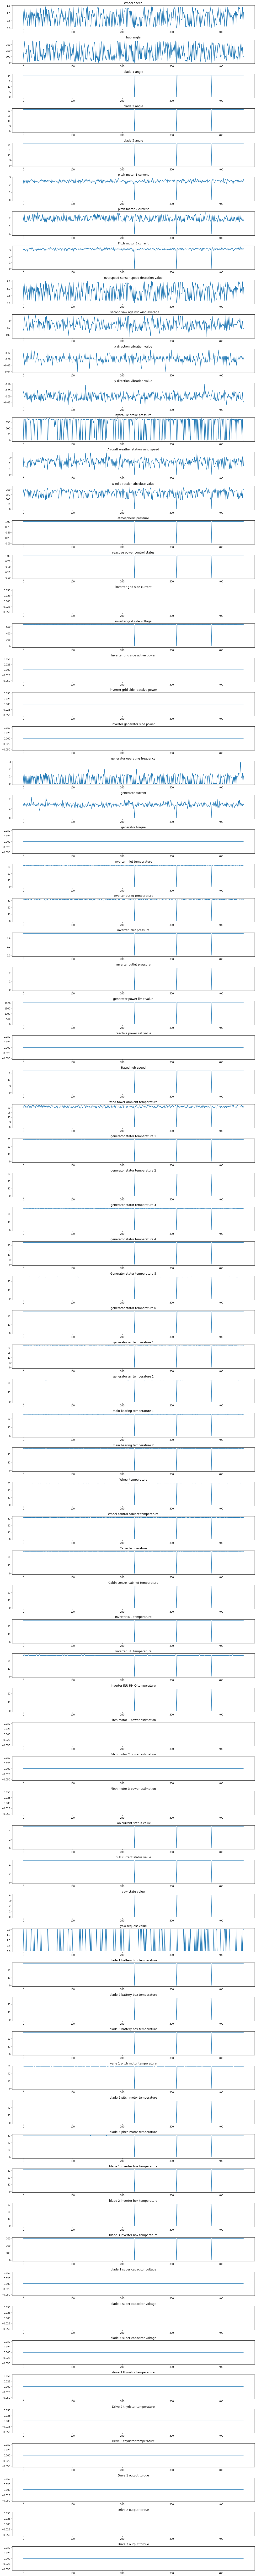

In [17]:
# Visualization (form Vorlage.ipynb)
numberOfcolumns = df_one_csv.shape[1]
col = df_one_csv.columns
plt.figure(figsize=(15,150))
for v in range(numberOfcolumns):
    a = plt.subplot(numberOfcolumns, 1, v+1)
    a.plot(df_one_csv.index.values, df_one_csv.iloc[:,v].values)
    a.title.set_text(col[v])
    plt.tight_layout()
plt.show()

Diese Plots geben einen groben Überblick über die Beschaffenheit des Datensatzes. Die CSV Dateien enthalten die Zeitserienwerte von 75 Sensoren. Es sind ausschließlich numerische Werte, es sind keine kategorischen Variablen vorhanden und teilweise sind Ausreißer zu erkennen.


### Gesamter Datensatz (train)
#### Null Werte

In [18]:
files_with_missing_values = []
count_files = 0
for file in files:
    count_files = count_files + 1
    Helpers.printProgressBar(count_files, len_files, prefix='Checking files for null values:', suffix='Complete', length=50, printEnd='')
    df = pd.read_csv(file)
    if df.isnull().values.any():
        files_with_missing_values.append(file)

print("Null values in train set: " + str(files_with_missing_values))

Checking files for null values: |██████████████████████████████████████████████████| 100.0% Complete
Null values in train set: []


Der train Datensatz ist vollständig und enthält keine Null Werte.

#### Label mapping
Wir untersuchen nun, ob für jede CSV Datei ein entsprechendes Label vorhanden ist.

In [ ]:
path_len = len(path_data + 'train/xxx/')
count_files = 0
missing_label = [] # Contains all the file names where no lable could be found
multiple_label = [] # Contains all the file names where multiple labels were ound
for file in files:
    count_files = count_files + 1
    Helpers.printProgressBar(count_files, len_files, prefix='Checking labels:', suffix='Complete', length=50, printEnd='')
    label_count = train_labels['file_name'].str.contains(file[path_len:]).sum()
    if label_count == 0:
        missing_label.append(file)
    elif label_count == 1:
        row = train_labels[train_labels['file_name'].str.contains(file[path_len:])]
        is_null = row[['ret']].isna().values.sum() # Find label NaN values
        if is_null:
            missing_label.append(file)
    else:
        multiple_label.append(file)

print("Missing Lables: " + str(len(missing_label)))
print(missing_label)
print("Multiple Lables: " + str(len(multiple_label)))
print(multiple_label)

Checking labels: |███████████████████████████████████████████████---| 94.1% Complete

Im train Datensatz fehlen keine Labels und die Labels kommen nicht mehrfach vor.





### Exploration: test data
#### Null Werte
Wir früren nun die selbe Untersuchung erneut auf dem test Datensatz durch.

In [ ]:
files_test = glob.glob(rootdir_test + '**/*.csv')
len_files_test = len(files_test)

In [ ]:
files_with_missing_values_test = []
count_files = 0
for file in files_test:
    count_files = count_files + 1
    Helpers.printProgressBar(count_files, len_files_test, prefix='Checking files for null values:', suffix='Complete', length=50, printEnd='')
    df = pd.read_csv(file)
    if df.isnull().values.any():
        files_with_missing_values_test.append(file)

print("Null values in test set: " + str(files_with_missing_values_test))

Der test Datensatz ist vollständig und enthält keine Null Werte.

#### Label mapping
Wir untersuchen nun, ob für jede CSV Datei ein entsprechendes Label vorhanden ist.

In [ ]:
path_len_test = len(path_data + 'test/xxx/')
count_files = 0
missing_label_test = [] # Contains all the file names where no lable could be found
multiple_label_test = [] # Contains all the file names where multiple labels were ound
for file in files_test[0:]:
    count_files = count_files + 1
    Helpers.printProgressBar(count_files, len_files_test, prefix='Checking labels:', suffix='Complete', length=50, printEnd='')
    label_count = test_labels['file_name'].str.contains(file[path_len:]).sum()
    if label_count == 0:
        missing_label_test.append(file)
    elif label_count == 1:
        row = test_labels[test_labels['file_name'].str.contains(file[path_len:])]
        is_null = row[['ret']].isna().values.sum() # Find label NaN values
        if is_null:
            missing_label_test.append(file)
    else:
        multiple_label_test.append(file)
print("Missing Lables: " + str(len(missing_label_test)))
print(missing_label_test)
print("Multiple Lables: " + str(len(multiple_label_test)))
print(multiple_label_test)

In [ ]:
# Write names of files with missing Labels to separate CSV file
missing_label_test2 = [[x[path_len_test:]] for x in missing_label_test] #Change 0 to path_len_test to get name only
with open(path_data + "missing_label_test_names.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(missing_label_test2)

Im test Datensatz gibt es Dateien ohne gültiges Label. Diese Dateien müssen entfernt bzw. ignoriert werden.

Im folgenden betrachten wir verarbeitete Datensätze. Diese enthällt die Mittelwerte bzw. die Mediane der jeweiligen CSV Dateien.

In [ ]:
# In the following we work on the condensed mean/median dataset (not on the original time series)
df = pd.read_csv('/Users/marvinwoller/Desktop/SmartDataAnalytics/Blatt2/data/features/median.csv', index_col=0, dtype={'area': str})

# Number of files per area
sns.barplot(data = df.groupby('area').count().reset_index(), x = 'area', y = 'label')

Dieser Plot zeigt die Anzahl der samples pro Gebiet. Diese Anzahl ist keineswegs gleich sondern unterscheidet sich stark für die einzelnen Gebiete.


Für weitere Untersuchungen bezüglich data/concept drift und Variablen Einfluss siehe:
- Data_Exploration_Concept_Drift.ipynb
- Data_Exploration_Importance_of_Features.ipynb